<a href="https://colab.research.google.com/github/mojtaba732/ML_Practice/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Performance vs Error Plot**

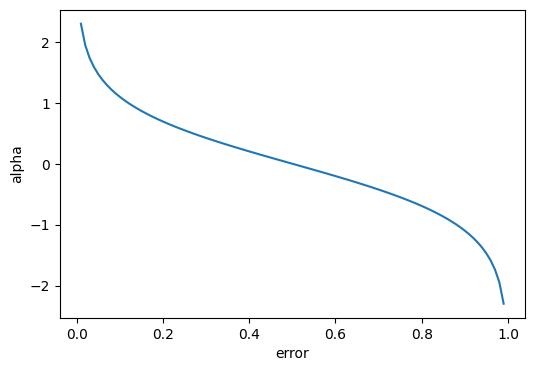

In [ ]:
alpha = lambda x:0.5*np.log((1-x)/x)
errors = np.arange(0.01,1,0.01)
plt.figure(figsize=(6,4))
plt.xlabel("error")
plt.ylabel("alpha")
plt.plot(errors,alpha(errors))


In [ ]:
class DecisionStump:
  def __init__(self):
    self.polarity = 1
    self.feature_idx = None
    self.split_threshold = None
    self.alpha = None

  def predict(self,X):
    n_samples = X.shape[0]
    X_column = X[:,self.feature_idx]
    predictions = np.ones(n_samples)
    if self.polarity == 1:
      predictions[X_column<self.split_threshold]=-1
    else:
      predictions[X_column>self.split_threshold]=-1
    return predictions



In [ ]:
class AdaBoost:
  def __init__(self,num_classifiers=5):
    self.num_classifiers = num_classifiers
    self.classifiers = None

  def fit(self,X,y):
    n_samples, n_features = X.shape
    #initialize weights
    w = np.full(n_samples,(1/n_samples))
    self.classifiers = []
    for _ in range(self.num_classifiers):
      classifier = DecisionStump()
      min_error = float('inf')
      for feature_i in range(n_features):
        X_column = X[:,feature_i]
        thresholds = np.unique(X_column)
        for threshold in thresholds:
          p = 1 #polarity
          predictions = np.ones(n_samples)
          predictions[X_column<threshold] = -1
          missclassified = w[y != predictions]
          error = sum(missclassified)

          if error > 0.5:
            error = 1 - error
            p = -1
          if error < min_error:
            min_error = error
            classifier.polarity = p
            classifier.split_threshold = threshold
            classifier.feature_idx = feature_i
      EPS = 1e-10
      classifier.alpha = 0.5*np.log((1-error)/(error+EPS))
      predictions = classifier.predict(X)
      w *= np.exp(-classifier.alpha*y*predictions)
      w /= np.sum(w)
      self.classifiers.append(classifier)

  def predict(self,X):
    classifier_preds = [clf.alpha*clf.predict(X) for clf in self.classifiers]
    y_pred = np.sum(classifier_preds,axis=0)
    y_pred = np.sign(y_pred)
    return y_pred





**Test Code**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy


data =  datasets.load_breast_cancer()
X = data.data
y = data.target

y[y == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
clf = AdaBoost(num_classifiers=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy(y_test,y_pred)
print(f"The Accuracy is {acc}")

The Accuracy is 0.9473684210526315
